In [1]:
import nltk
from nltk.stem.lancaster import LancasterStemmer
from pandas.io.json import json_normalize
import numpy as np
import tflearn
import tensorflow as tf
import random
import json
import string
import unicodedata
import sys
import pandas as pd

C:\Users\Manasa\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


curses is not supported on this machine (please install/reinstall curses for an optimal experience)


In [2]:
import json
with open('NETFLIX_EARRNINGS_CALL_TRANSCRIPT_Q3_2018.json') as json_data:
    data = json.load(json_data)
    print(data)

{'text': {'0': 'Netflix, Inc. (NASDAQ:NFLX) Q3 2018 Earnings Conference Call October 16, 2018  6:00 PM ET', '1': 'Executives', '2': 'Spencer Wang - VP, Finance and Investor Relations', '3': 'Reed Hastings - Co-Founder and Chief Executive Officer', '4': 'David Wells - Chief Financial Officer', '5': 'Greg Peters - Chief Product Officer', '6': 'Ted Sarandos - Chief Content Officer', '7': 'Analysts', '8': 'Eric Sheridan - UBS', '9': 'Spencer Wang', '10': "Good afternoon and welcome to the Netflix Q3 2018 Earnings Interview. I'm Spencer Wang, VP of IR and Corporate Development. Joining me today are CEO, Reed Hastings; CFO, David Wells; Chief Content Officer, Ted Sarandos; and Chief Product Officer, Greg Peters. Our interviewer this quarter is Eric Sheridan from UBS.", '11': 'As a reminder, we will be making forward-looking statements and actual results may vary.', '12': 'With that, over to you now Eric, for the first question.', '13': 'Question-and-Answer Session', '14': 'Q - Eric Sheridan'

In [3]:
#df = pd.DataFrame.from_dict(json_normalize(data), orient='columns')
transcripts=pd.read_json('NETFLIX_EARRNINGS_CALL_TRANSCRIPT_Q3_2018.json')
df=transcripts

In [4]:
categories = list(data.keys())

In [5]:
categories

['text', 'Sentiments']

In [6]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Manasa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
df

,text,Sentiments
0,"Netflix, Inc. (NASDAQ:NFLX) Q3 2018 Earnings C...",Neutral
1,Executives,Neutral
10,Good afternoon and welcome to the Netflix Q3 2...,Positive
100,"So a couple questions; number one, what have y...",Positive
101,Reed Hastings,Neutral
102,"Ted, do you want to take that?",Neutral
103,Ted Sarandos,Neutral
104,"Yes, I would say that, one thing that we've le...",Positive
105,"So what we're learning more and more is that, ...",Positive
106,So that gives us – and we do it over many titl...,Positive


In [8]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
transcripts


vectorizer = CountVectorizer()
print(vectorizer.fit_transform(transcripts['text']).todense())

Vocabulary=vectorizer.vocabulary_
print(Vocabulary)

[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
{'netflix': 721, 'inc': 543, 'nasdaq': 714, 'nflx': 727, 'q3': 884, '2018': 9, 'earnings': 320, 'conference': 221, 'call': 169, 'october': 742, '16': 5, '00': 0, 'pm': 826, 'et': 354, 'executives': 374, 'good': 479, 'afternoon': 46, 'and': 71, 'welcome': 1216, 'to': 1128, 'the': 1098, 'interview': 564, 'spencer': 1016, 'wang': 1203, 'vp': 1200, 'of': 743, 'ir': 576, 'corporate': 240, 'development': 274, 'joining': 586, 'me': 667, 'today': 1129, 'are': 85, 'ceo': 188, 'reed': 909, 'hastings': 502, 'cfo': 191, 'david': 261, 'wells': 1218, 'chief': 197, 'content': 231, 'officer': 747, 'ted': 1083, 'sarandos': 944, 'product': 855, 'greg': 485, 'peters': 807, 'our': 775, 'interviewer': 565, 'this': 1114, 'quarter': 887, 'is': 577, 'eric': 352, 'sheridan': 976, 'from': 450, 'ubs': 1158, 'so': 1000, 'couple': 247, 'questions': 892, 'number': 739, 'one': 751, 'what': 1221, 'h

In [9]:
List=list(Vocabulary.keys())

print(List)


['netflix', 'inc', 'nasdaq', 'nflx', 'q3', '2018', 'earnings', 'conference', 'call', 'october', '16', '00', 'pm', 'et', 'executives', 'good', 'afternoon', 'and', 'welcome', 'to', 'the', 'interview', 'spencer', 'wang', 'vp', 'of', 'ir', 'corporate', 'development', 'joining', 'me', 'today', 'are', 'ceo', 'reed', 'hastings', 'cfo', 'david', 'wells', 'chief', 'content', 'officer', 'ted', 'sarandos', 'product', 'greg', 'peters', 'our', 'interviewer', 'this', 'quarter', 'is', 'eric', 'sheridan', 'from', 'ubs', 'so', 'couple', 'questions', 'number', 'one', 'what', 'have', 'you', 'learned', 'in', 'some', 'changes', 'made', 'marketing', 'year', 'how', 'do', 'think', 'that', 'might', 'inform', 'go', 'market', 'as', 'company', 'going', 'forward', 'both', 'for', 'subscriber', 'growth', 'then', 'support', 'on', 'side', 'want', 'take', 'yes', 'would', 'say', 'thing', 'we', 've', 'gotten', 'along', 'there', 'was', 'time', 'when', 'didn', 'any', 'spent', 'all', 'effort', 'just', 'talking', 'about', 'u

In [10]:
tokenized_headlines = []
for each in transcripts['text']:
    split = each.split()
    tokenized_headlines.append(split)
tokenized_headlines

[['Netflix,',
  'Inc.',
  '(NASDAQ:NFLX)',
  'Q3',
  '2018',
  'Earnings',
  'Conference',
  'Call',
  'October',
  '16,',
  '2018',
  '6:00',
  'PM',
  'ET'],
 ['Executives'],
 ['Good',
  'afternoon',
  'and',
  'welcome',
  'to',
  'the',
  'Netflix',
  'Q3',
  '2018',
  'Earnings',
  'Interview.',
  "I'm",
  'Spencer',
  'Wang,',
  'VP',
  'of',
  'IR',
  'and',
  'Corporate',
  'Development.',
  'Joining',
  'me',
  'today',
  'are',
  'CEO,',
  'Reed',
  'Hastings;',
  'CFO,',
  'David',
  'Wells;',
  'Chief',
  'Content',
  'Officer,',
  'Ted',
  'Sarandos;',
  'and',
  'Chief',
  'Product',
  'Officer,',
  'Greg',
  'Peters.',
  'Our',
  'interviewer',
  'this',
  'quarter',
  'is',
  'Eric',
  'Sheridan',
  'from',
  'UBS.'],
 ['So',
  'a',
  'couple',
  'questions;',
  'number',
  'one,',
  'what',
  'have',
  'you',
  'learned',
  'in',
  'some',
  'of',
  'the',
  'changes',
  'you',
  'made',
  'in',
  'marketing',
  'this',
  'year?',
  'And',
  'how',
  'do',
  'you',
  '

In [11]:
punctuation = [",", ":", ";", ".", "'", '"', "’", "?", "/", "-", "+", "&", "(", ")"]
clean_tokenized = []
loweredtokens=[]
for item in tokenized_headlines:
    tokens = []
    for token in item:
        token = token.lower()
        for punc in punctuation:
            token = token.replace(punc, "")
        tokens.append(token)
    clean_tokenized.append(tokens)

In [12]:
clean_tokenized

[['netflix',
  'inc',
  'nasdaqnflx',
  'q3',
  '2018',
  'earnings',
  'conference',
  'call',
  'october',
  '16',
  '2018',
  '600',
  'pm',
  'et'],
 ['executives'],
 ['good',
  'afternoon',
  'and',
  'welcome',
  'to',
  'the',
  'netflix',
  'q3',
  '2018',
  'earnings',
  'interview',
  'im',
  'spencer',
  'wang',
  'vp',
  'of',
  'ir',
  'and',
  'corporate',
  'development',
  'joining',
  'me',
  'today',
  'are',
  'ceo',
  'reed',
  'hastings',
  'cfo',
  'david',
  'wells',
  'chief',
  'content',
  'officer',
  'ted',
  'sarandos',
  'and',
  'chief',
  'product',
  'officer',
  'greg',
  'peters',
  'our',
  'interviewer',
  'this',
  'quarter',
  'is',
  'eric',
  'sheridan',
  'from',
  'ubs'],
 ['so',
  'a',
  'couple',
  'questions',
  'number',
  'one',
  'what',
  'have',
  'you',
  'learned',
  'in',
  'some',
  'of',
  'the',
  'changes',
  'you',
  'made',
  'in',
  'marketing',
  'this',
  'year',
  'and',
  'how',
  'do',
  'you',
  'think',
  'that',
  'mi

In [13]:
import numpy as np
unique_tokens = []
single_tokens = []
for each in clean_tokenized:
    for every in each:
        if every not in unique_tokens:
            unique_tokens.append(every)
counts = pd.DataFrame(0, index=np.arange(len(clean_tokenized)),columns=unique_tokens)

In [14]:
for count, elem in enumerate(clean_tokenized):
    for token in elem:
        if token in unique_tokens:
            counts.iloc[count][token] += 1

In [15]:
word_counts = counts.sum(axis=0)

counts = counts.loc[:,(word_counts >= 5) & (word_counts <= 100)]
counts

,netflix,q3,call,spencer,wang,today,are,reed,hastings,david,...,experience,something,id,awareness,incredible,creating,markets,india,competitive,campaigns
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,2,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(counts, transcripts["Sentiments"], test_size=0.2, random_state=1)

In [66]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)

predictions



array(['Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral',
       'Neutral', 'Positive', 'Neutral', 'Positive', 'Neutral', 'Neutral',
       'Neutral', 'Positive', 'Neutral', 'Positive', 'Positive',
       'Neutral', 'Positive', 'Neutral', 'Neutral', 'Neutral', 'Positive',
       'Positive', 'Neutral', 'Neutral', 'Positive', 'Positive',
       'Negative', 'Positive', 'Neutral', 'Neutral', 'Neutral', 'Neutral',
       'Neutral', 'Neutral'], dtype=object)

In [71]:
prediction = pd.DataFrame(predictions, columns=['predictions']).to_csv('prediction.csv')

In [73]:
y_test
y_test_csv= pd.DataFrame(predictions, columns=['y_test']).to_csv('y_test.csv')

In [68]:
clf.score(X_test,y_test)

0.75

In [69]:
clf.score(X_train,y_train)

1.0

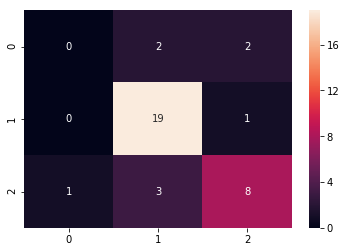

In [23]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, predictions)
cnf_matrix
sn.heatmap(cnf_matrix, annot=True)

In [19]:
y_train_predictions=clf.predict(X_train)
y_train_predictions

array(['Neutral', 'Positive', 'Neutral', 'Positive', 'Positive',
       'Neutral', 'Neutral', 'Positive', 'Neutral', 'Positive',
       'Positive', 'Positive', 'Positive', 'Neutral', 'Neutral',
       'Neutral', 'Positive', 'Neutral', 'Neutral', 'Neutral', 'Neutral',
       'Neutral', 'Positive', 'Positive', 'Neutral', 'Neutral', 'Neutral',
       'Neutral', 'Positive', 'Neutral', 'Positive', 'Positive',
       'Neutral', 'Positive', 'Neutral', 'Positive', 'Neutral',
       'Positive', 'Positive', 'Neutral', 'Neutral', 'Positive',
       'Neutral', 'Positive', 'Neutral', 'Neutral', 'Neutral', 'Positive',
       'Neutral', 'Positive', 'Positive', 'Positive', 'Neutral',
       'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral',
       'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral',
       'Neutral', 'Positive', 'Neutral', 'Positive', 'Negative',
       'Negative', 'Positive', 'Neutral', 'Neutral', 'Neutral',
       'Positive', 'Neutral', 'Positive', 'Neutr

In [20]:
cm_train = metrics.confusion_matrix(y_train, y_train_predictions)
cm_train

array([[ 9,  0,  0],
       [ 0, 78,  0],
       [ 0,  0, 53]], dtype=int64)

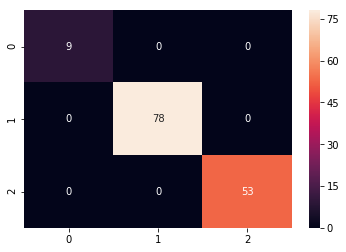

In [24]:
import seaborn as sn
sn.heatmap(cm_train, annot=True)

In [25]:
# Testing data on all data 

In [27]:
microsoft = pd.read_json('microsoft.json')
microsoft.shape

(152, 2)

In [28]:
google = pd.read_json('google_call_earnings.json')
google.shape

(138, 2)

In [30]:
facebook = pd.read_json('FB_earnings_call_transcript.json')
facebook.shape

(157, 2)

In [37]:



data = json.load(open('Amazon_Q3_2018_Earning_Call_Transcript_Sentiment_Manual.json'))

#df = pd.DataFrame(data)
#amazon = pd.read_json('Amazon_Q3_2018_Earning_Call_Transcript_Sentiment_Manual.json')
#amazon.shape

In [56]:
import pandas as pd
alldata=pd.read_csv('out.csv')

In [57]:
alldata

,Unnamed: 0,text,sentiment
0,0,Greetings and welcome to the Microsoft Fiscal ...,positive
1,1,technology. Microsoft 365 helps every organiza...,positive
2,2,is coming from the line of Walter Pritchard wi...,positive
3,3,we're growing at eye-popping rates right now. ...,neutral
4,4,the key things that we think about is differen...,positive
5,5,"servers, we have the best crowd platform for w...",neutral
6,6,Cosmos DB. This was actually a database we jus...,positive
7,7,"way we build Office 365, the way we build our ...",neutral
8,8,of dollars just because of the number of marke...,neutral
9,9,growth in that PBP segment with the components...,positive


,Unnamed: 0,text,sentiment
0,0,Greetings and welcome to the Microsoft Fiscal ...,positive
1,1,technology. Microsoft 365 helps every organiza...,positive
2,2,is coming from the line of Walter Pritchard wi...,positive
3,3,we're growing at eye-popping rates right now. ...,neutral
4,4,the key things that we think about is differen...,positive
